# plot exercise 과제
## 2020112167 민장규
### seaborn 내의 tips 데이터셋을 이용해 다양한 시각화 방법을 사용해보고 분석해보는 과제

In [80]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [81]:
tips = sns.load_dataset("tips")

In [82]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


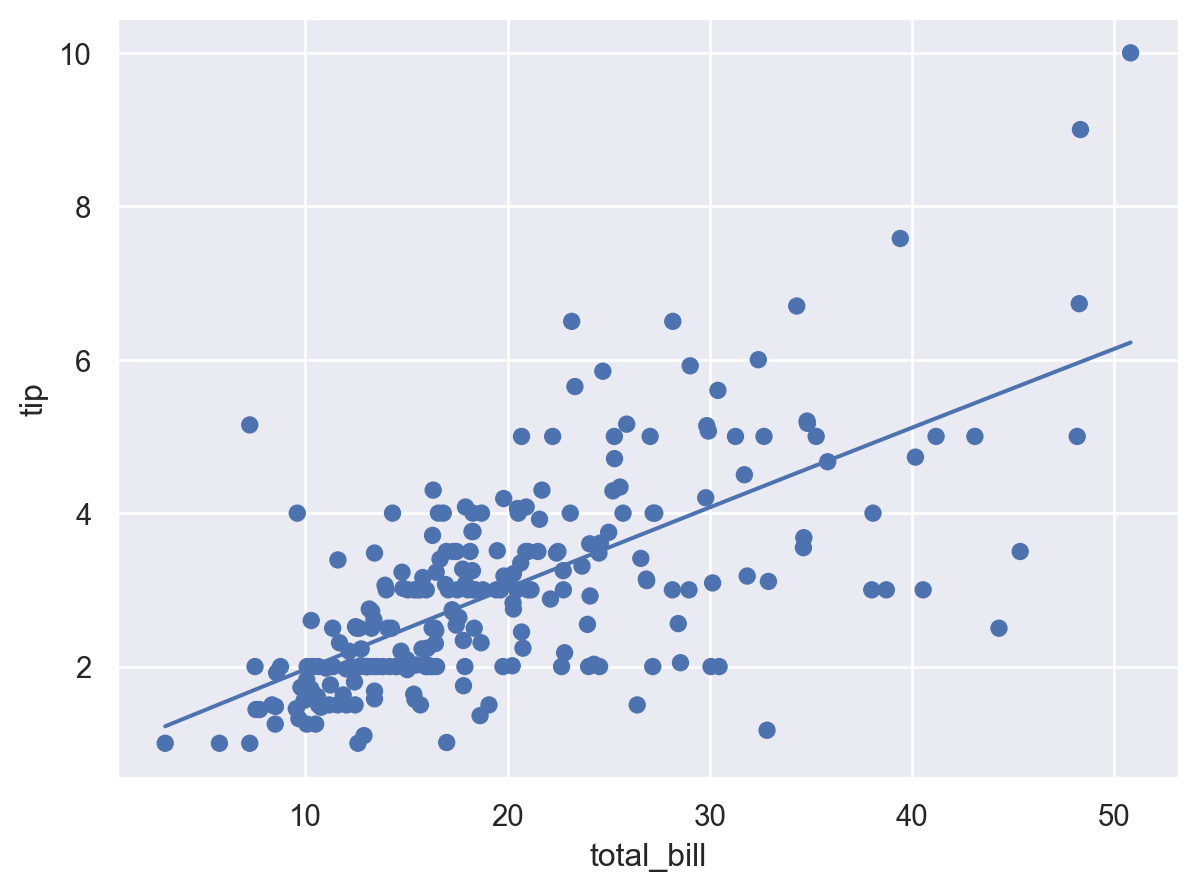

In [83]:
'''
total_bill & tip 상관관계를 조사했습니다.
두 변수는 거의 선형적인 관계를 보여주고 있고, total_bill 커질수록 tip 또한 커짐을 알 수 있었습니다.
'''

(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(2))
)

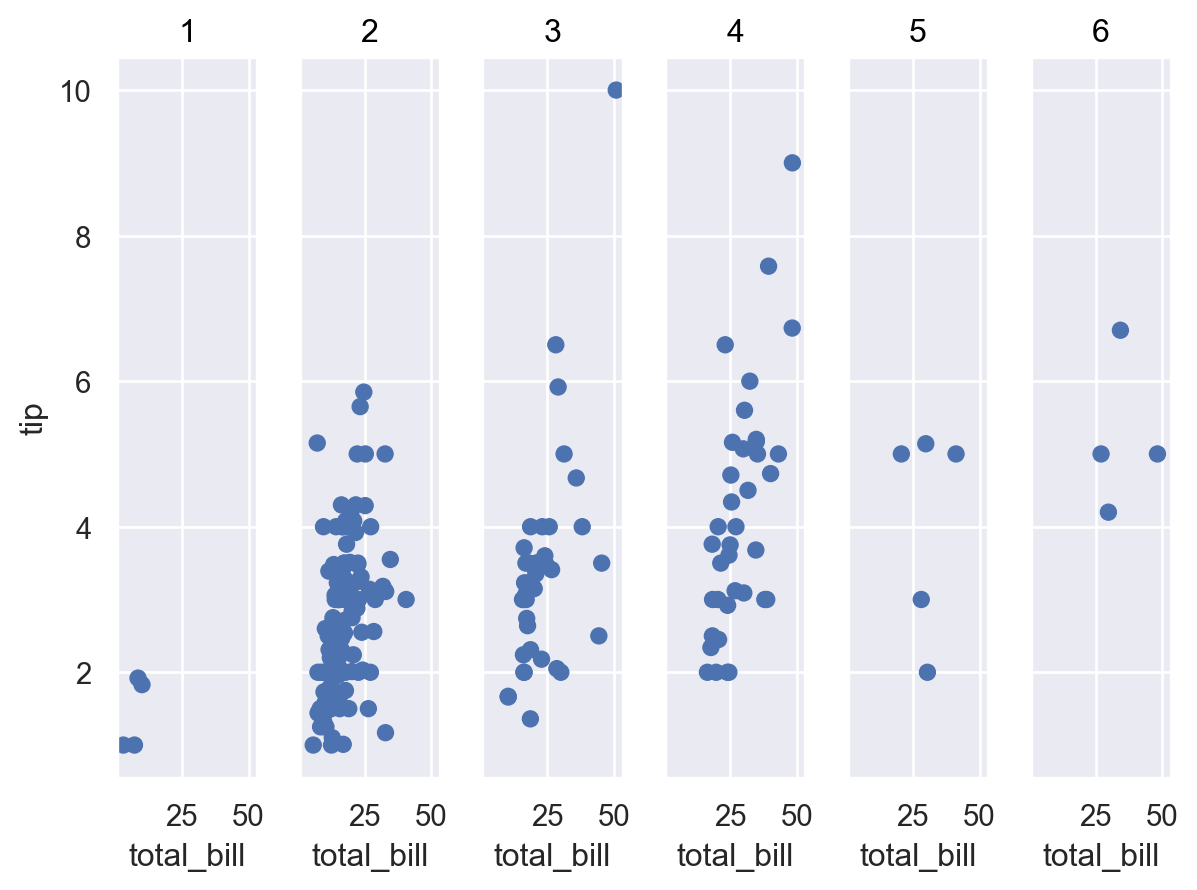

In [84]:
'''
total_bill & tip의 size별로 상관관계를 조사했습니다.
size가 클 수록 total_bill 역시 전체적으로 커짐을 확인할 수 있었습니다.
'''

(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot())
    .facet("size")
)

<Axes: xlabel='size', ylabel='tip'>

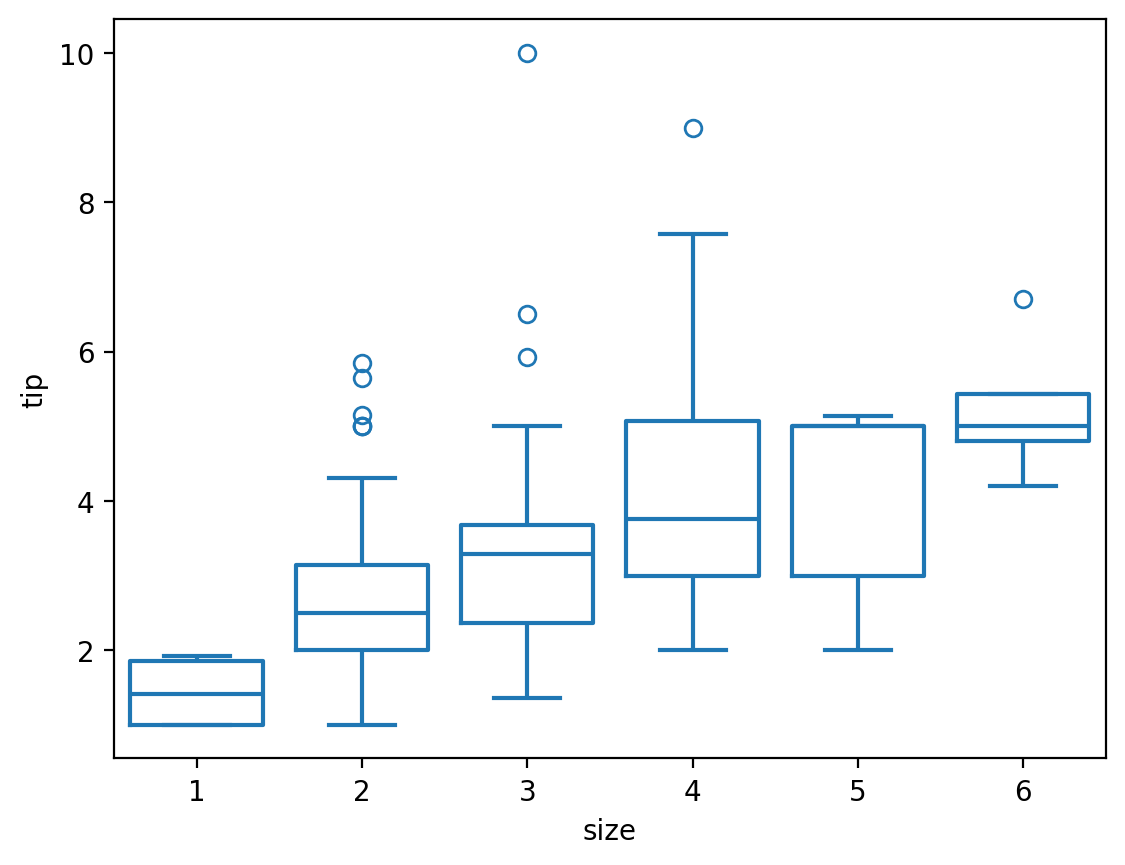

In [85]:
'''
size가 클 수록 total_bill 분포를 구체적으로 알아보고자 boxplot을 사용하여 조사했습니다.
'''

sns.boxplot(tips, x="size", y="tip", fill=False)

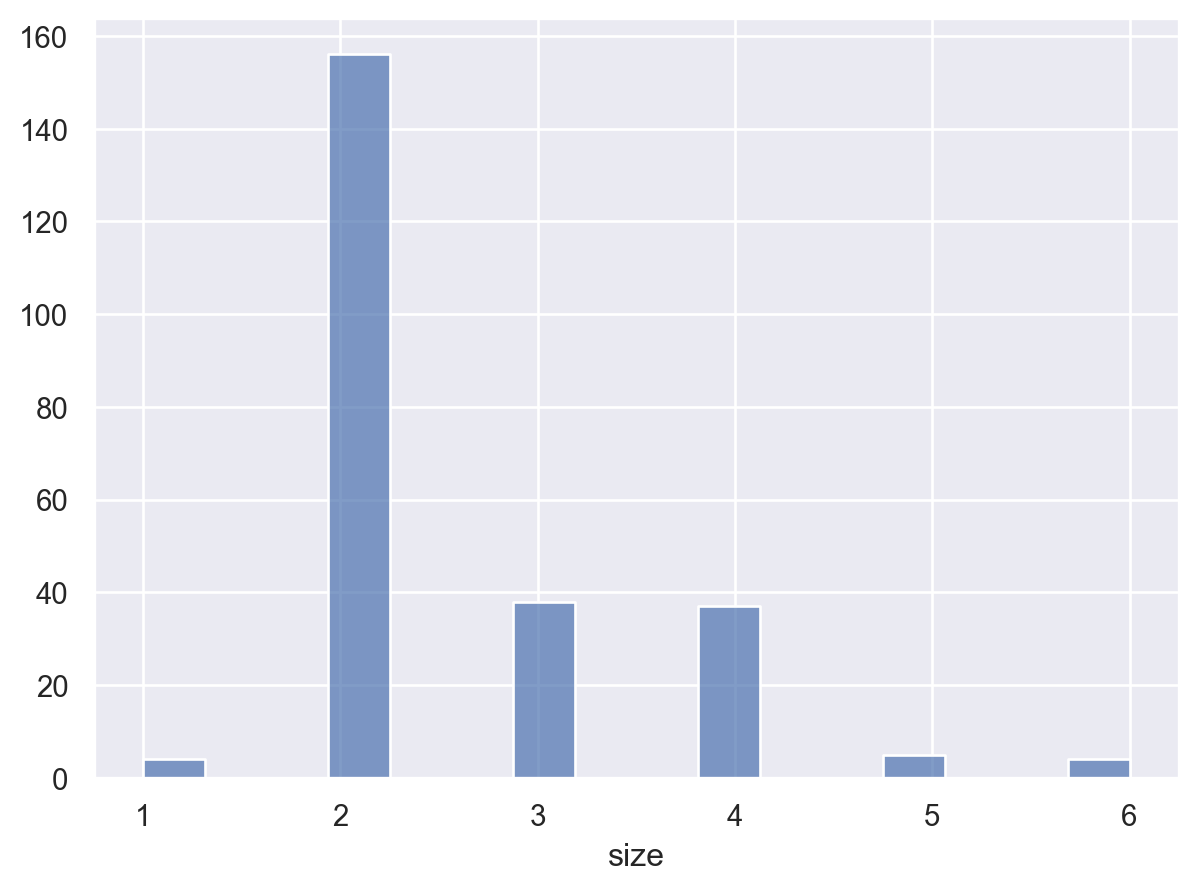

In [86]:
'''
각 인원 수 별로 조사한 결과 2명이서 온 경우가 가장 많음을 확인할 수 있었습니다.
'''

(
    so.Plot(tips, x = "size")
    .add(so.Bars(), so.Hist())
)

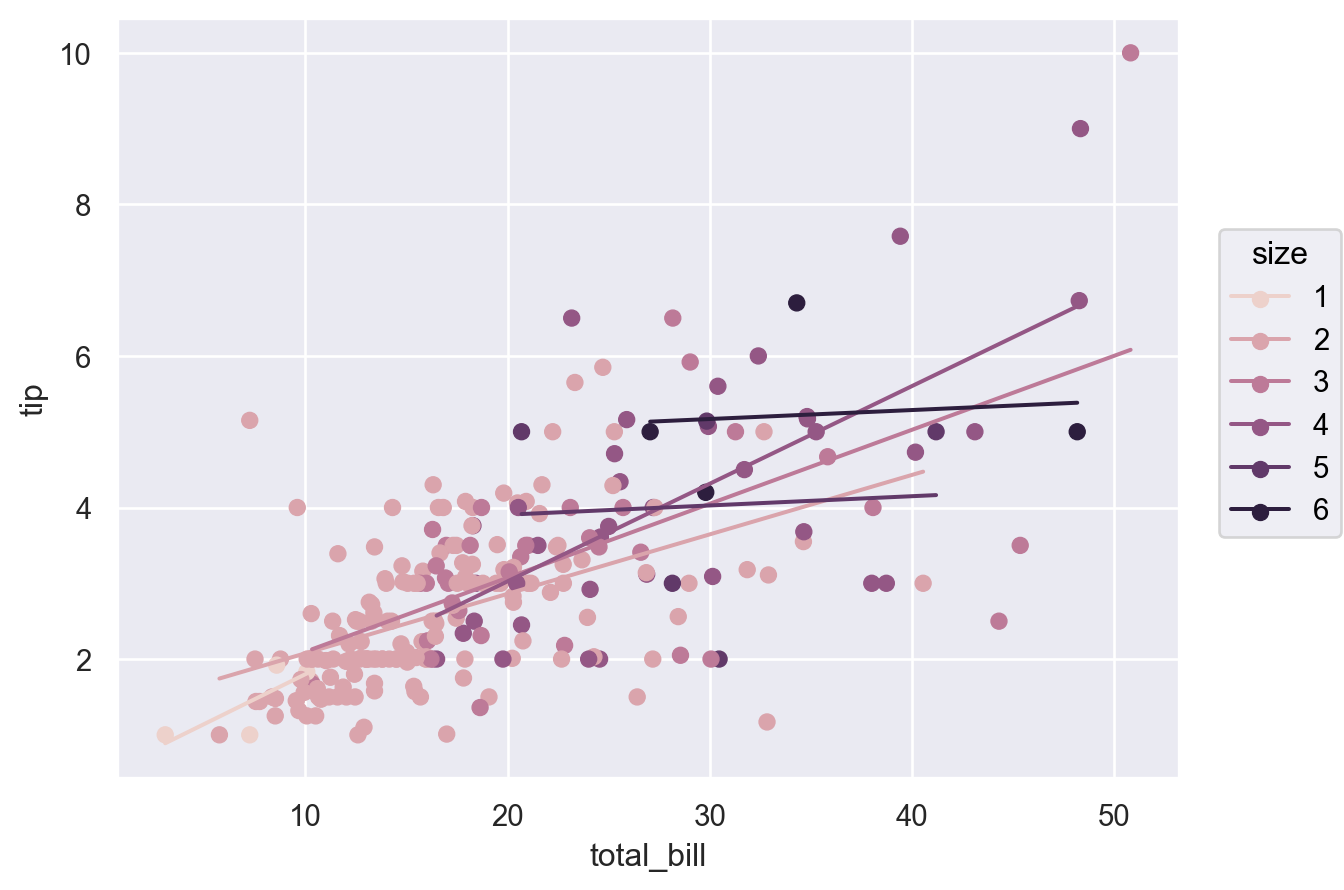

In [87]:
'''
total_bill & tip의 size별로 상관관계를 조사했습니다.
각 size에서 total_bill과 tip은 모두 선형적으로 올라가는 관계를 띌 것이라고 예상했으나 size 5, size 6의 경우 표본 수가 적어 예상했던 것과는 다른 결과가 나왔습니다.
'''

(
    so.Plot(tips, x="total_bill", y="tip", color="size")
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(1))
)

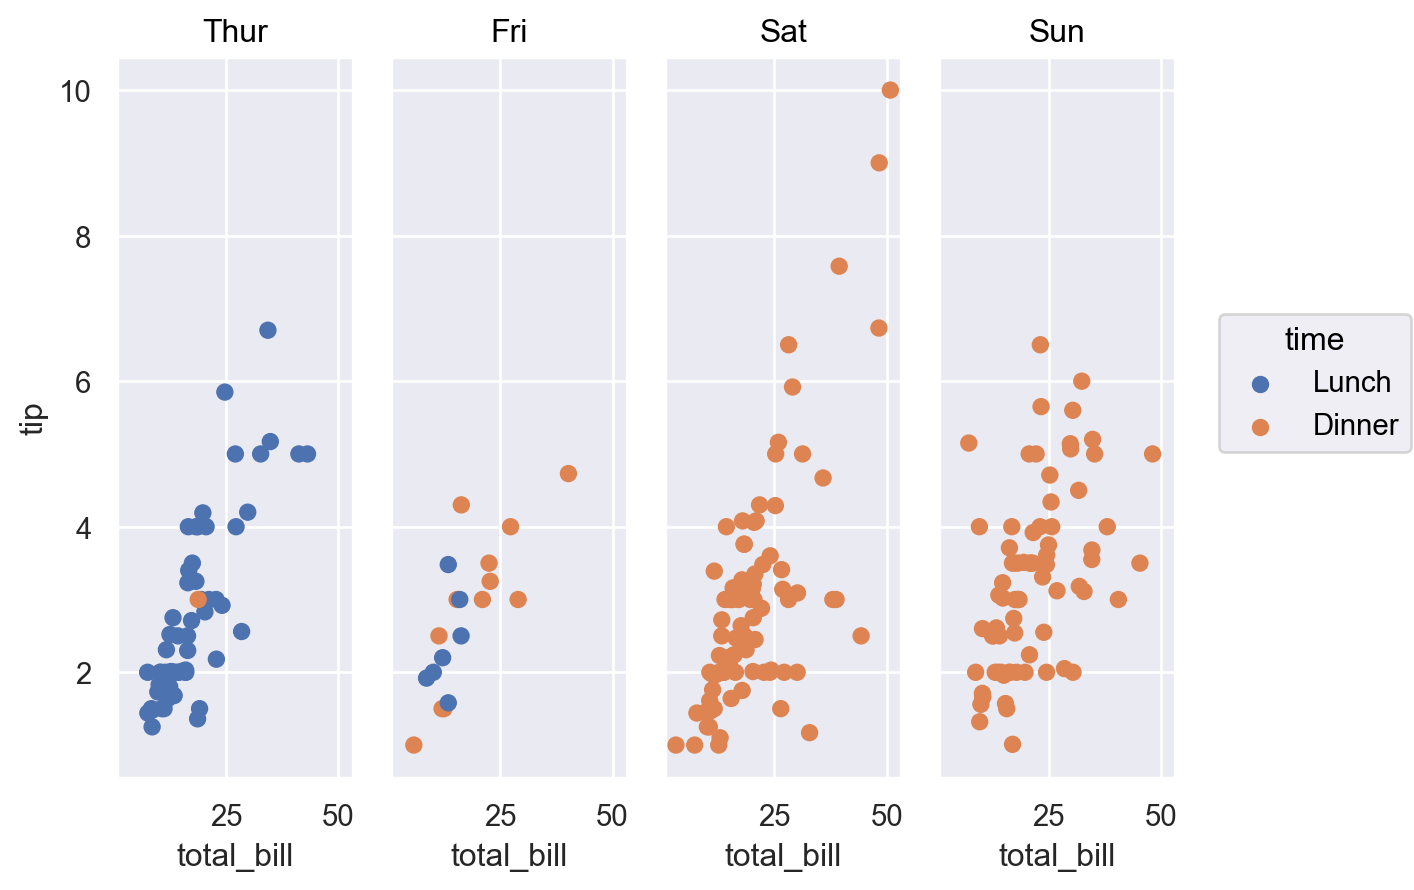

In [88]:
'''
각 요일별로 점심과 저녁 중 어떤 시간에 tip 지출이 몰려있을지 조사했습니다.
목요일이 점심에 몰려있는 반면, 토요일과 일요일의 경우 모두 저녁시간 때 tip이 몰려있음을 확인할 수 있었습니다.
'''

(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dot())
    .facet("day")
)

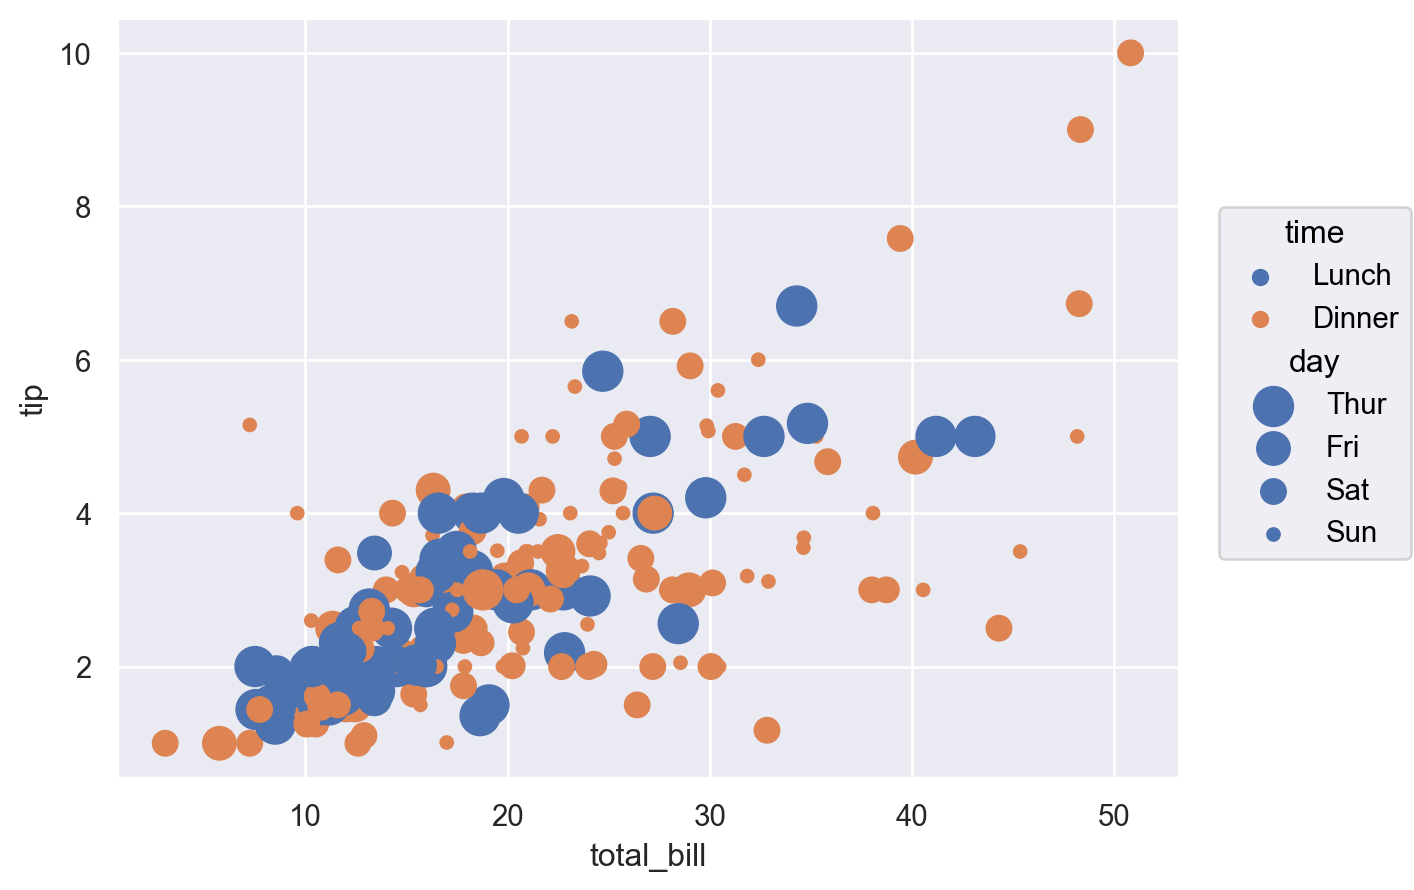

In [89]:
'''
각 요일별로 점심과 저녁 중 어떤 시간에 tip 지출이 몰려있을지에 대한 조사 결과를 다른 시각화 방법을 이용하여 표현했습니다.
'''

(
    so.Plot(tips, x="total_bill", y="tip", color="time", pointsize="day")
    .add(so.Dot())
    .scale(pointsize = (5, 15))
)

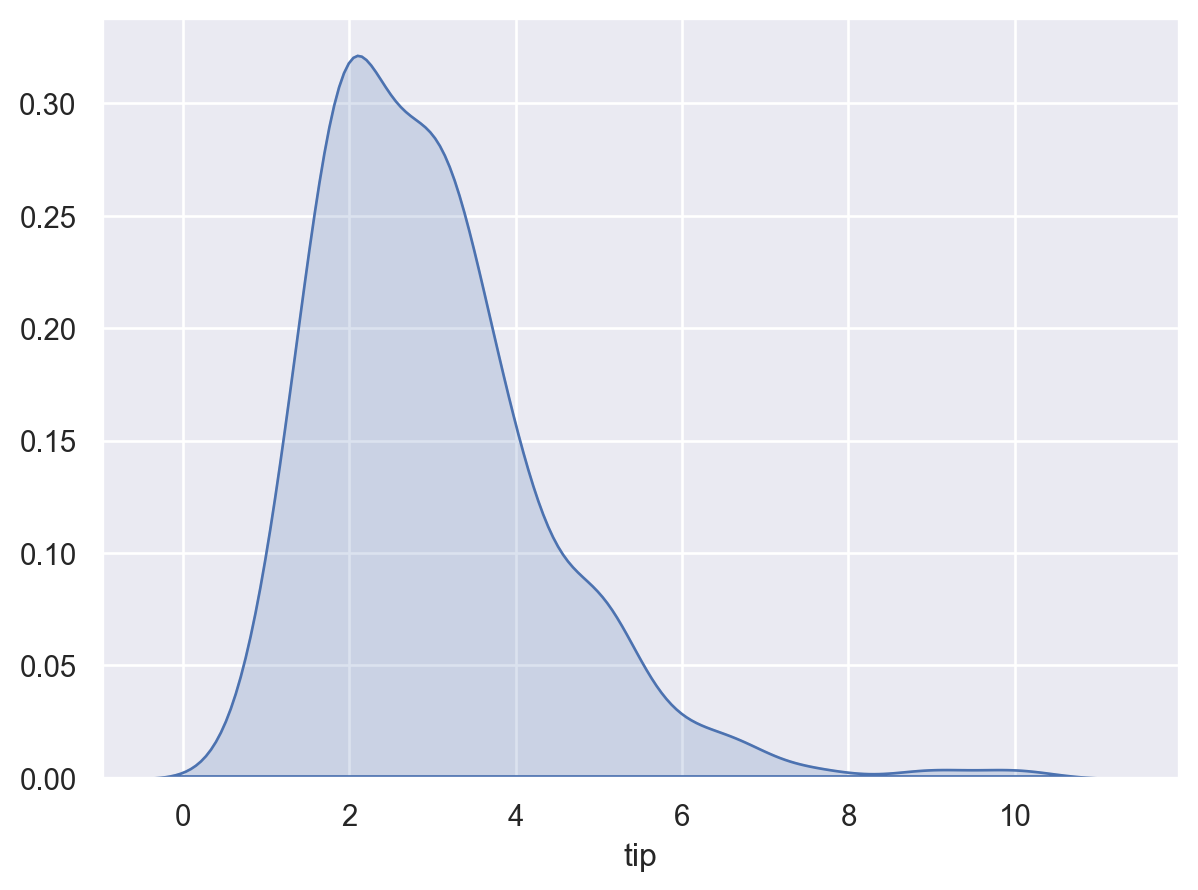

In [90]:
'''
tip histogram 시각화
'''

(
    so.Plot(tips, x = "tip")
    .add(so.Area(), so.KDE(common_norm = False))
)

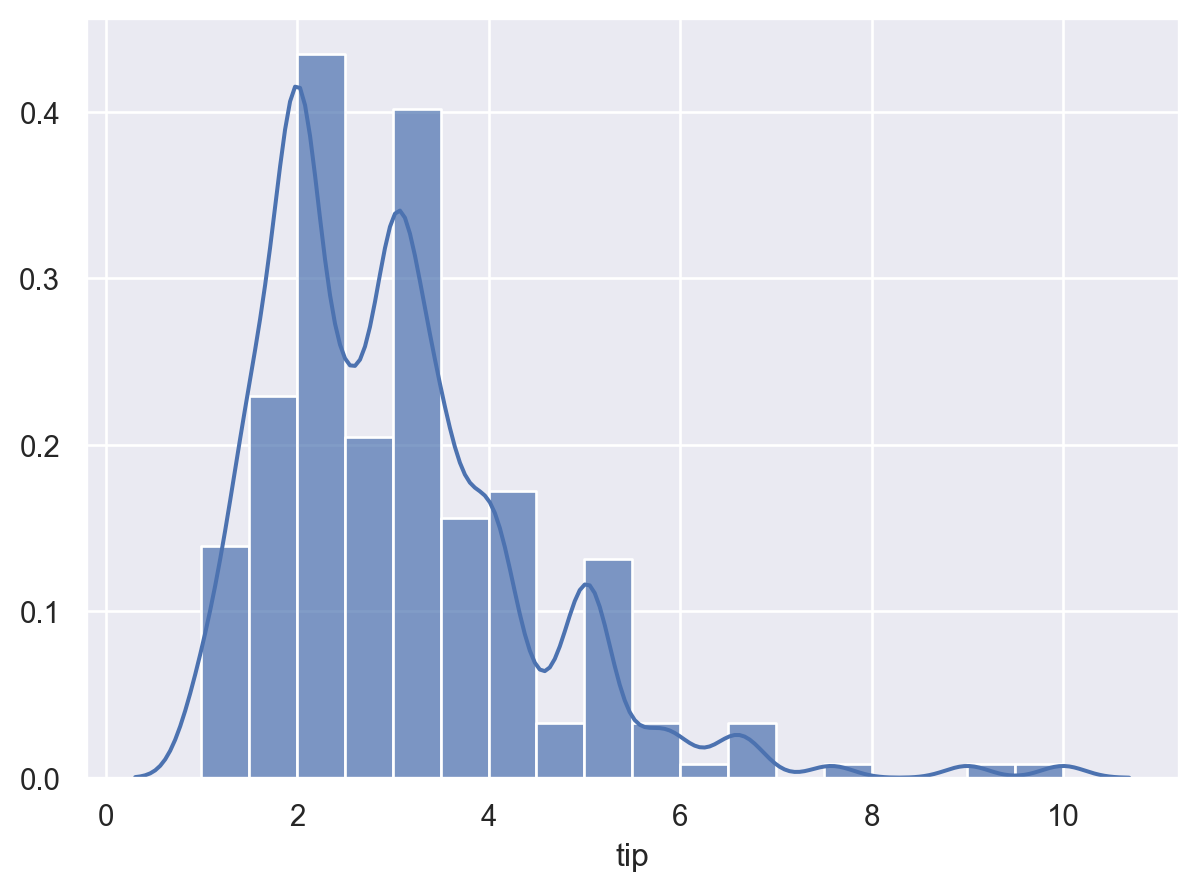

In [91]:
'''
tip histogram 시각화
'''

(
    so.Plot(tips, x = "tip")
    .add(so.Line(), so.KDE(bw_adjust = .5))
    .add(so.Bars(), so.Hist("density", binwidth = .5))
)         

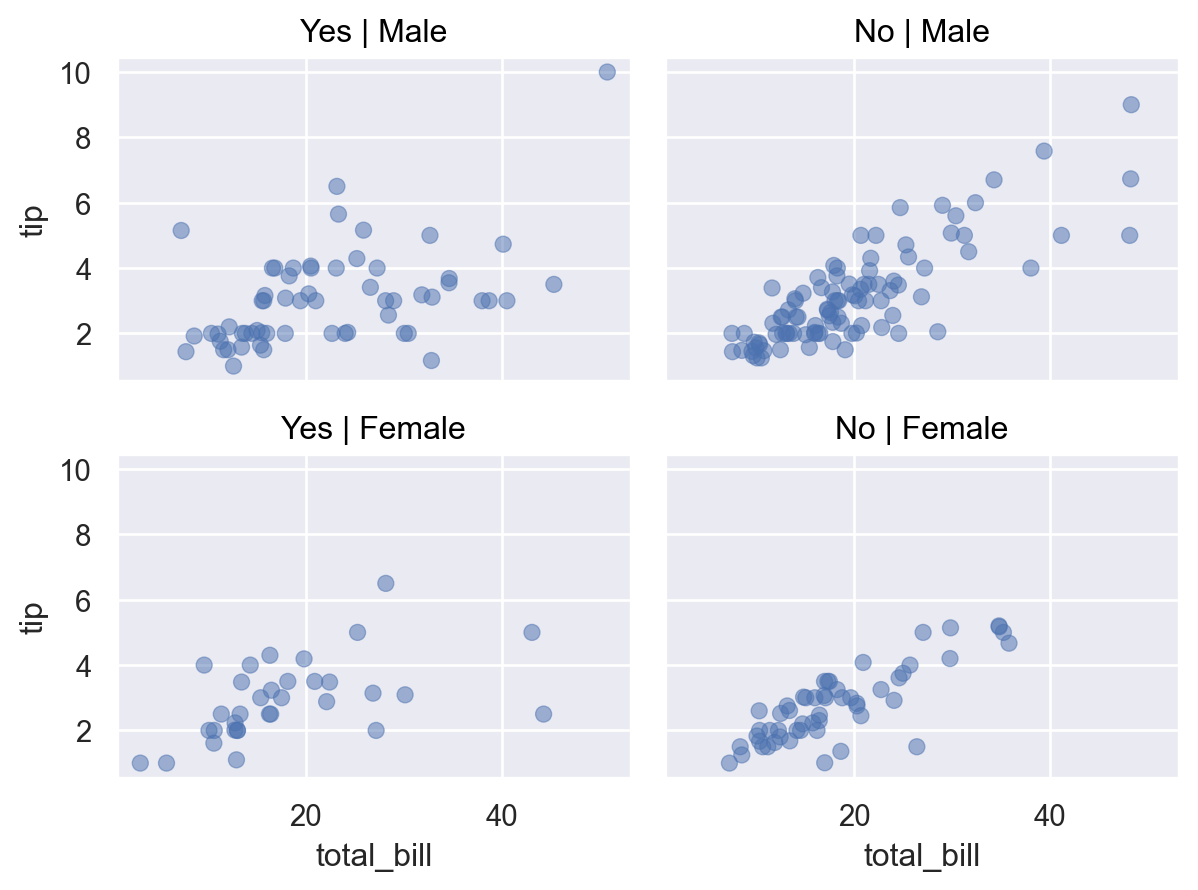

In [92]:
'''
total bill과 tip의 상관관계를 smoker & sex에 따라 faceting 방식으로 시각화했습니다.
'''

(
    so.Plot(tips, x="total_bill", y="tip")
    .facet(col="smoker", row="sex")
    .add(so.Dot(alpha=.5))
)

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

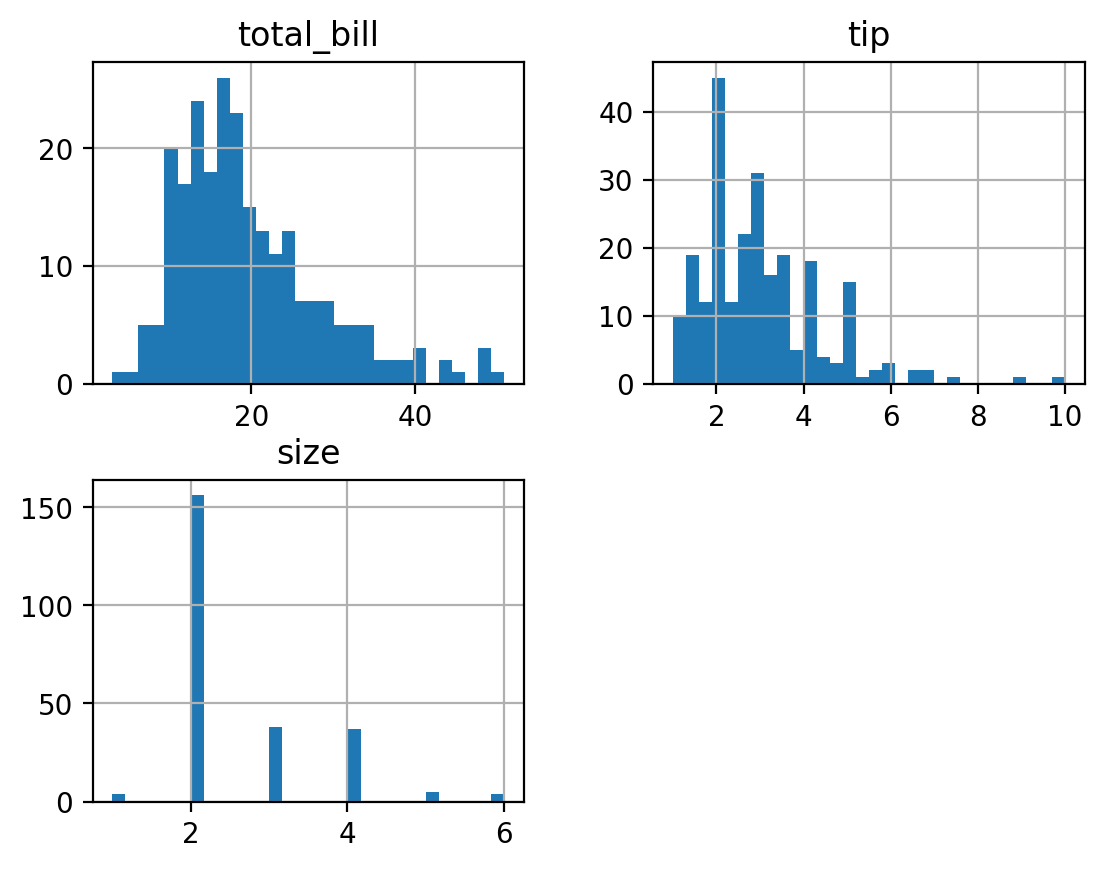

In [93]:
'''
tips 내의 모든 연속 변수에 대한 histogram 작성
'''

tips.hist(bins=30)

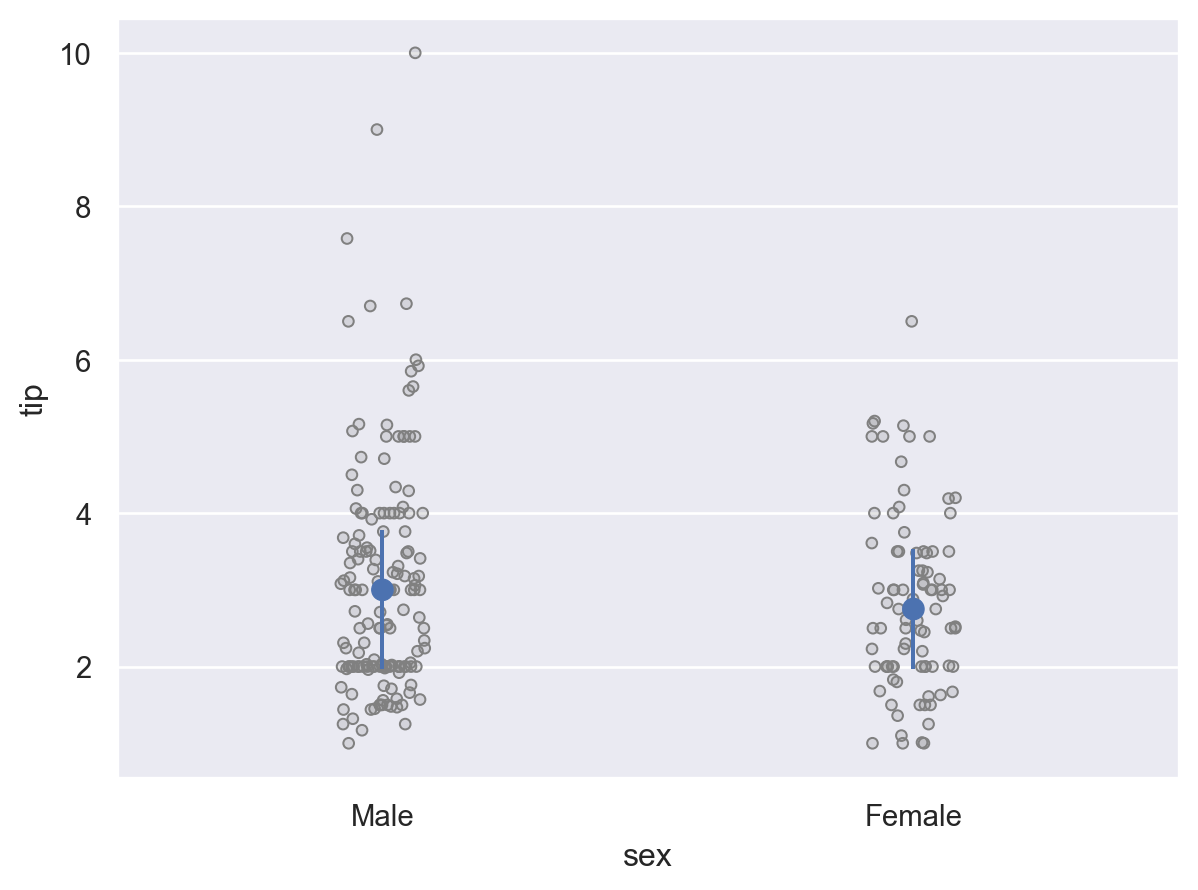

In [94]:
'''
sex & tip 과의 상관관계
'''

(
    so.Plot(tips, x="sex", y="tip")
    .add(so.Dots(color=".5"), so.Jitter()) 
    .add(so.Dot(pointsize=8), so.Agg("median"))  
    .add(so.Range(), so.Est(errorbar=("pi", 50)))  
)

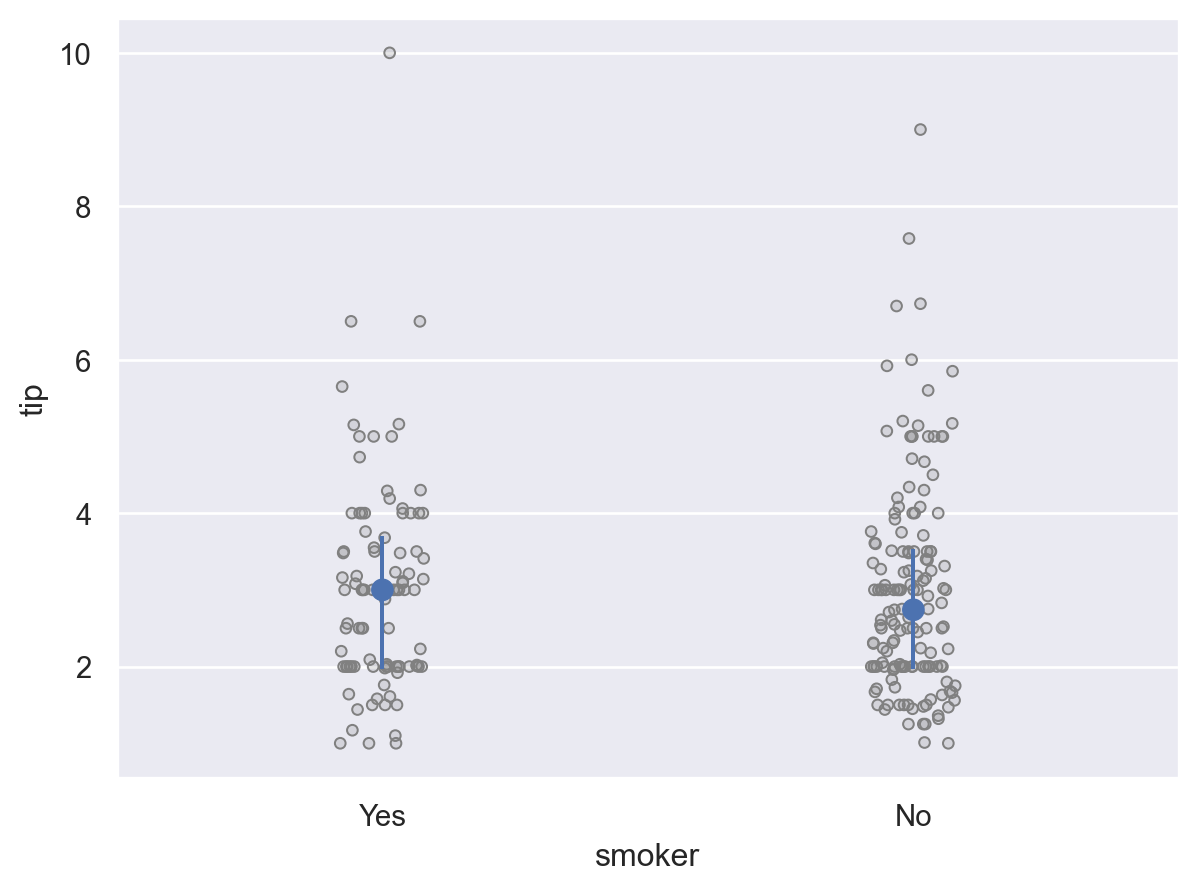

In [95]:
'''
smoker & tip 과의 상관관계
'''

(
    so.Plot(tips, x="smoker", y="tip")
    .add(so.Dots(color=".5"), so.Jitter()) 
    .add(so.Dot(pointsize=8), so.Agg("median"))  
    .add(so.Range(), so.Est(errorbar=("pi", 50)))  
)

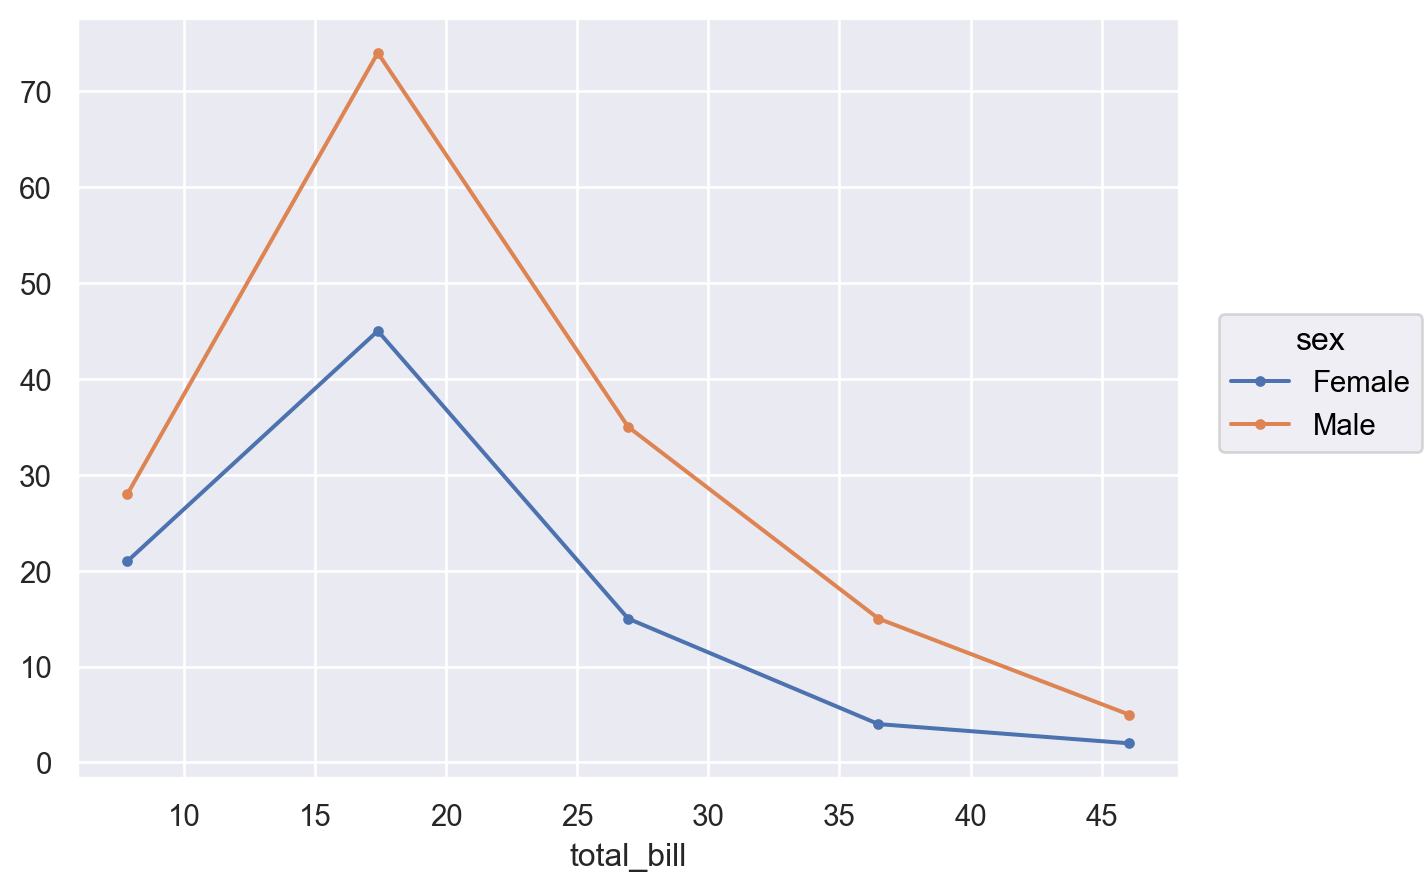

In [96]:
'''
sex & total bill 과의 상관관계
'''

(
    so.Plot(tips, x="total_bill", color="sex")
    .add(so.Line(marker="."), so.Hist(binwidth=10)) 
)

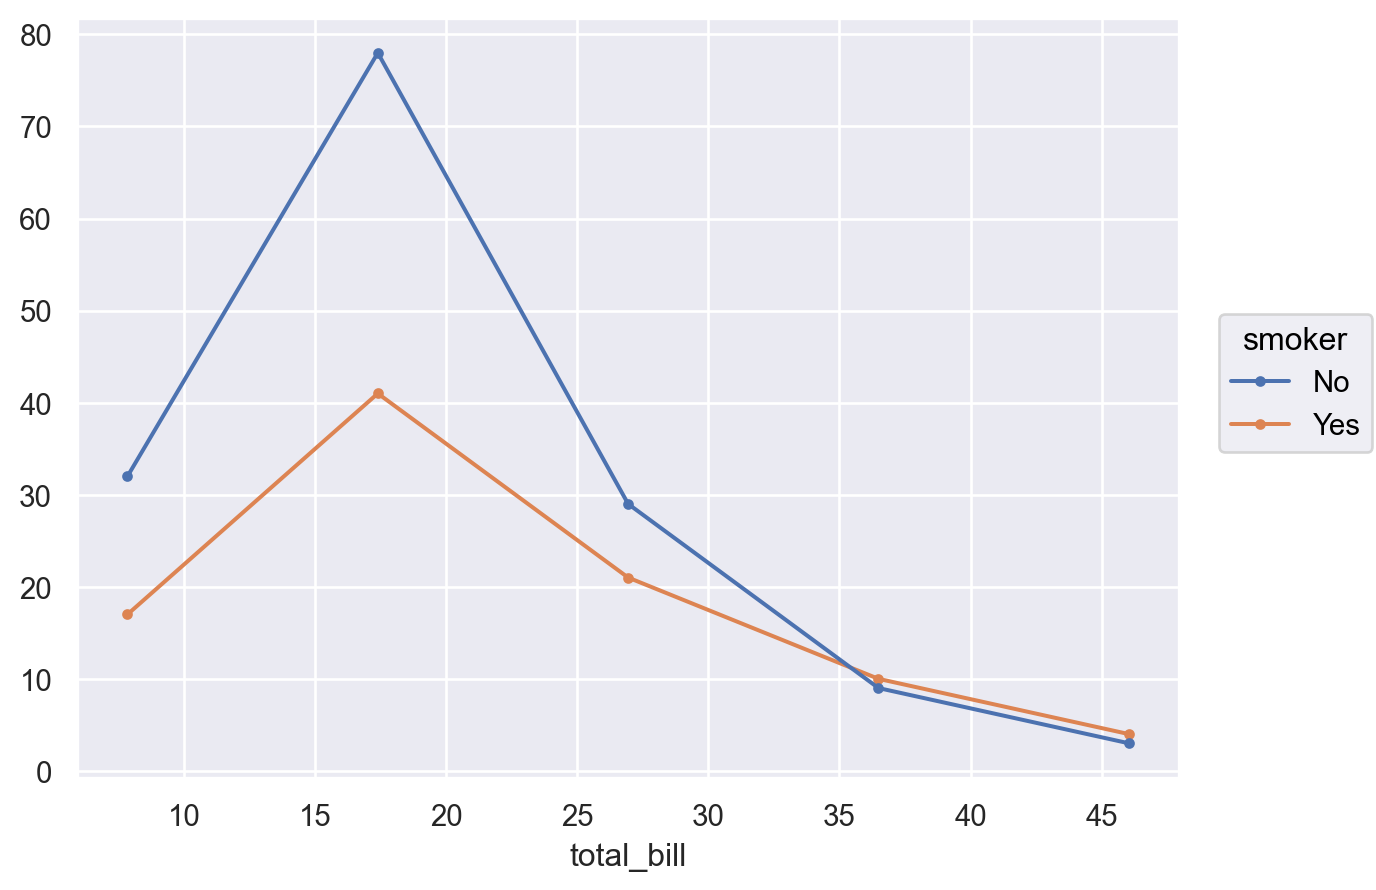

In [97]:
'''
smoker & total bill 과의 상관관계
'''

(
    so.Plot(tips, x="total_bill", color="smoker")
    .add(so.Line(marker="."), so.Hist(binwidth=10)) 
)

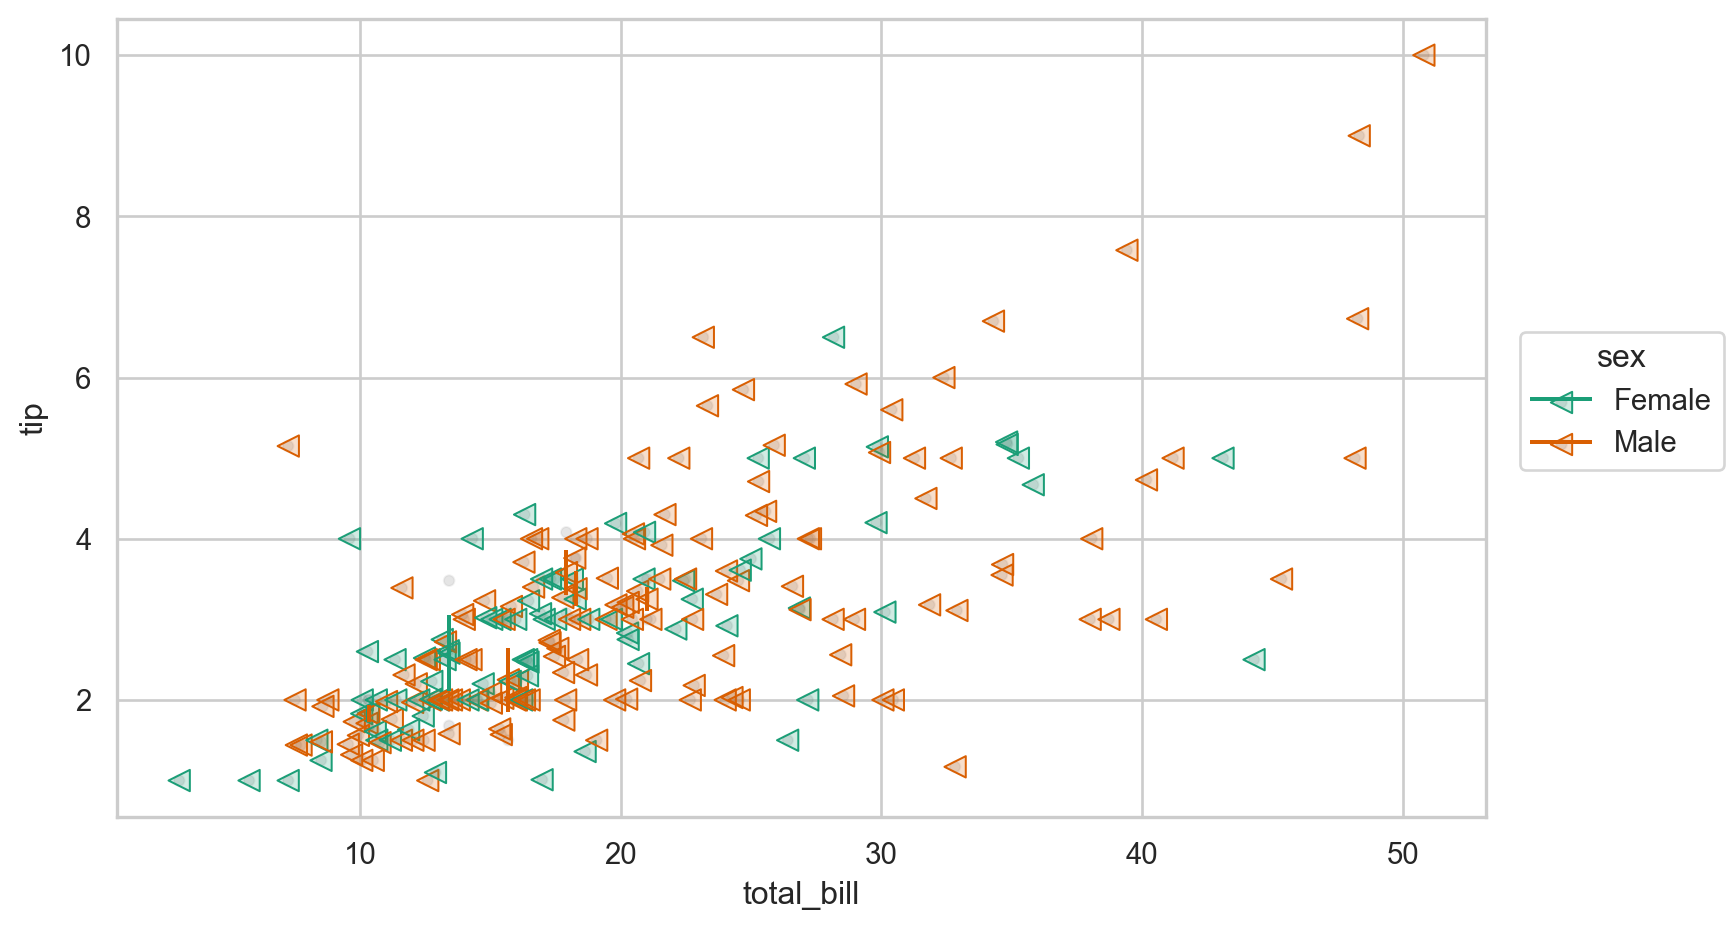

In [98]:
def boxplot(df, x, y, color=None, alpha=0.1):
    return (
        so.Plot(df, x=x, y=y, color=color)
        .add(so.Dots(alpha=alpha, color=".5"), so.Jitter(), so.Dodge())
        .add(so.Range(), so.Est(errorbar=("pi", 50)), so.Dodge())
        .add(so.Dots(pointsize=8, marker="<"), so.Agg("median"), so.Dodge())
        .scale(color="Dark2")
        .theme({**sns.axes_style("whitegrid")})
    )

(
    boxplot(tips, x="total_bill", y="tip", color="sex")
    .layout(size=(8, 5))
)

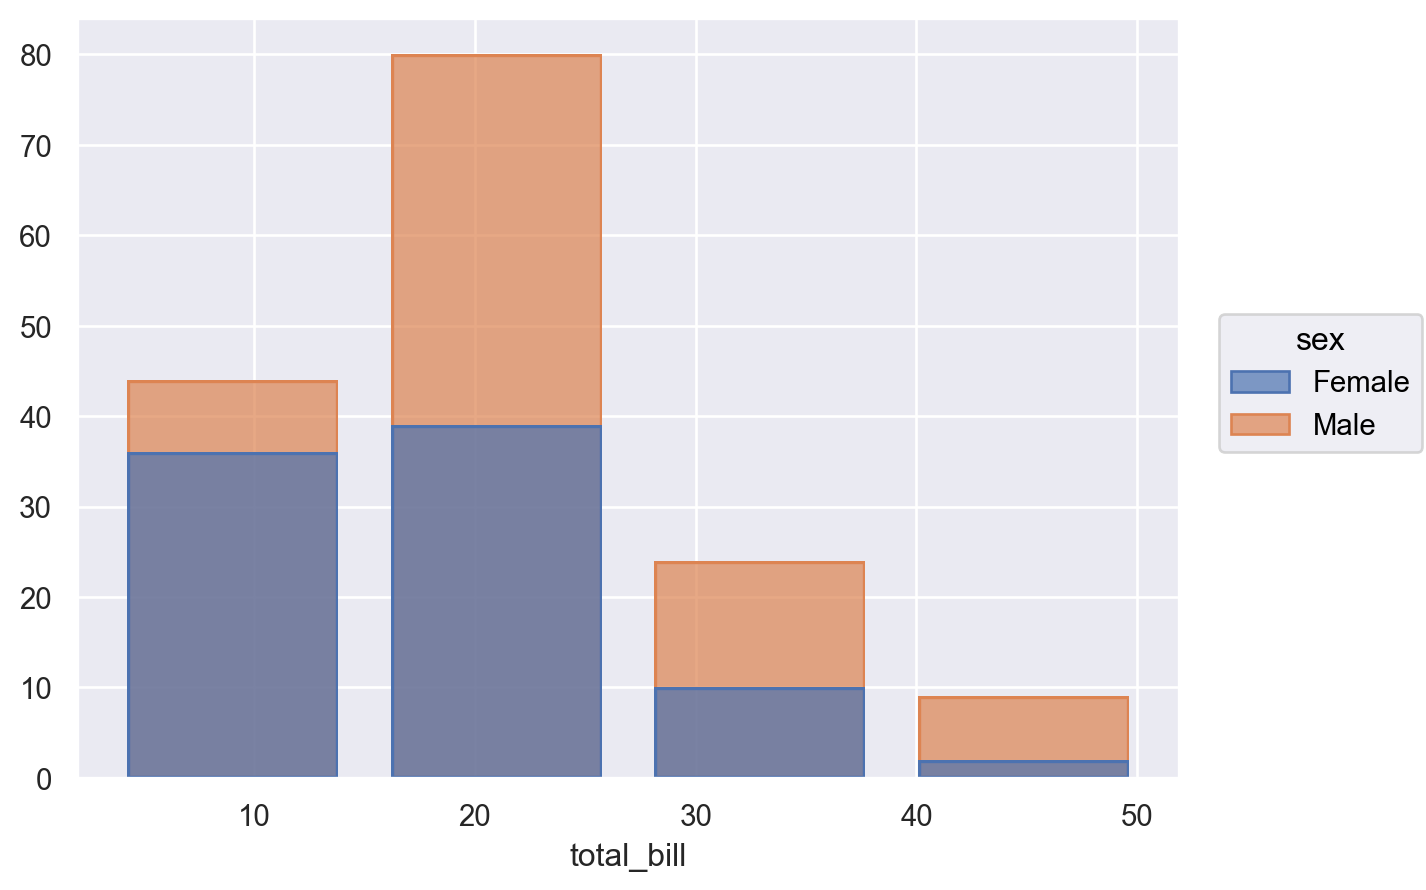

In [99]:
(
    so.Plot(tips, x="total_bill", color="sex")
    .add(so.Bar(),so.Hist(binwidth = 11, common_bins = True)) 
)

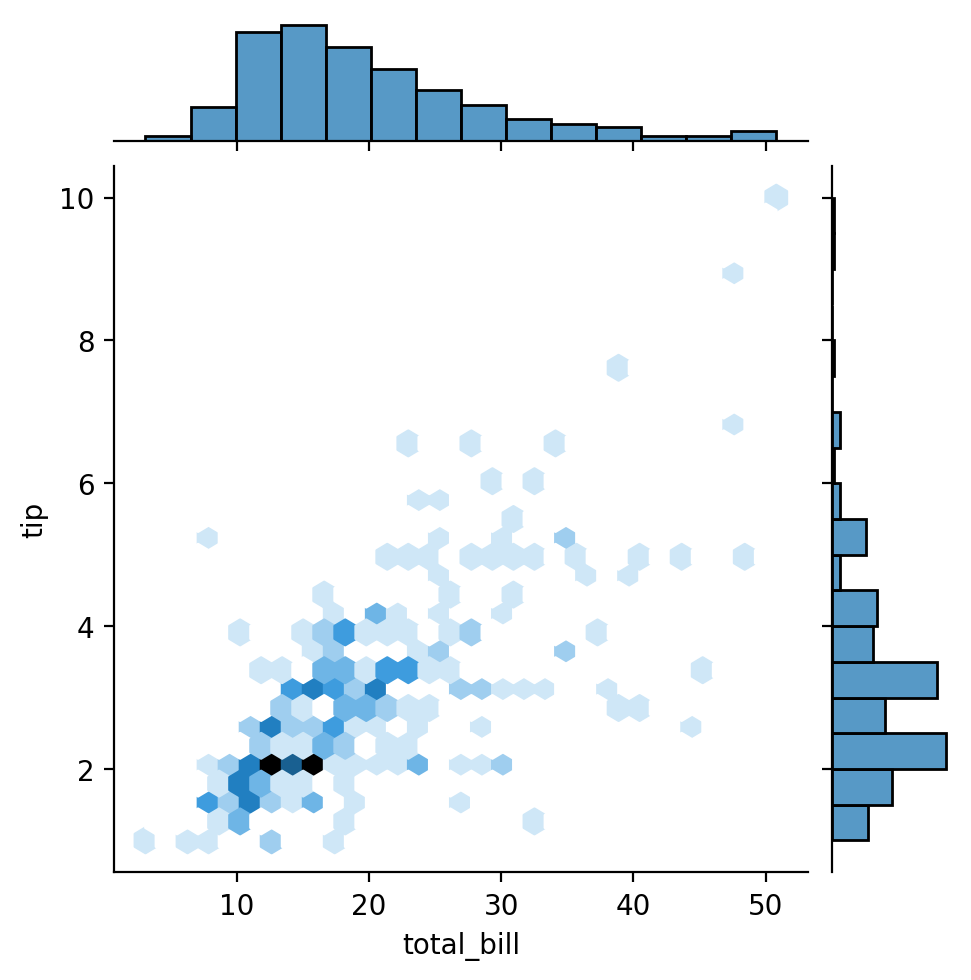

In [100]:
sns.jointplot(tips, x="total_bill", y="tip", kind="hex", gridsize=30, height=5)